In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/BoothCamp/updated_churnrate.xlsx'

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# Step 2: Load and inspect the dataset
data = pd.read_excel(file_path)
data.head() # Display the first few rows of the dataset

,Unnamed: 0.1,Unnamed: 0,CustomerID,Gender,Age,Tenure,ServiceTier,MonthlyCharges,TotalCharges,NumTechnicalSupportCalls,HasInternetService,Churn
0,0,0.0,1,Male,25,12,Basic,29.99,359.88,0,No,No
1,1,1.0,2,Female,34,4,Premium,89.99,359.96,2,Yes,Yes
2,2,2.0,3,Female,20,2,Basic,19.99,39.98,1,Yes,No
3,3,3.0,4,Male,45,23,Plus,60.99,1402.77,3,Yes,No
4,4,4.0,5,Female,39,45,Premium,100.99,4544.45,4,Yes,Yes


In [5]:
data

,Unnamed: 0.1,Unnamed: 0,CustomerID,Gender,Age,Tenure,ServiceTier,MonthlyCharges,TotalCharges,NumTechnicalSupportCalls,HasInternetService,Churn
0,0,0.0,1,Male,25,12,Basic,29.990000,359.88,0,No,No
1,1,1.0,2,Female,34,4,Premium,89.990000,359.96,2,Yes,Yes
2,2,2.0,3,Female,20,2,Basic,19.990000,39.98,1,Yes,No
3,3,3.0,4,Male,45,23,Plus,60.990000,1402.77,3,Yes,No
4,4,4.0,5,Female,39,45,Premium,100.990000,4544.45,4,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1005,NaN,1006,Female,36,41,Premium,115.045359,<function <lambda> at 0x7fd36961f9d0>,9,Yes,Yes
1006,1006,NaN,1007,Male,69,2,Basic,32.410356,<function <lambda> at 0x7fd36961f9d0>,0,No,Yes
1007,1007,NaN,1008,Female,45,20,Premium,49.995022,<function <lambda> at 0x7fd36961f9d0>,6,Yes,Yes
1008,1008,NaN,1009,Female,31,43,Basic,67.579361,<function <lambda> at 0x7fd36961f9d0>,3,Yes,Yes


In [6]:
# Step 3: Encode categorical variables
# Handling missing values
data = data.dropna()
# Converting 'TotalCharges' from string to numeric
# data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
# # One-Hot Encoding
# ohe = OneHotEncoder(drop='first')
# ohe.fit(data[['Gender', 'ServiceTier', 'HasInternetService']])
# encoded_features = ohe.transform(data[['Gender', 'ServiceTier', 'HasInternetService']]).toarray()
# encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['Gender', 'ServiceTier', 'HasInternetService']))
# data = pd.concat([data, encoded_features_df], axis=1)
# data.drop(['Gender', 'ServiceTier', 'HasInternetService'], axis=1, inplace=True)

In [7]:
# data.head()

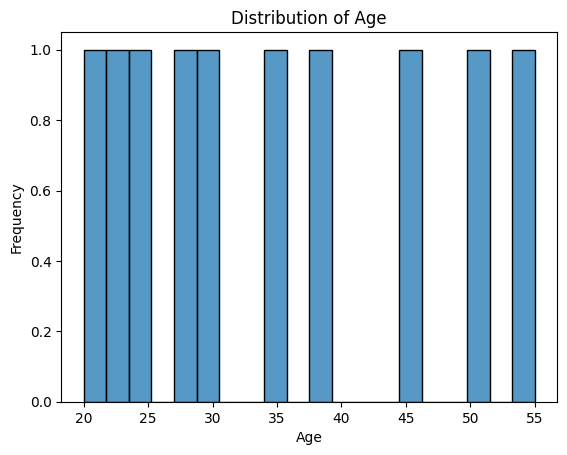

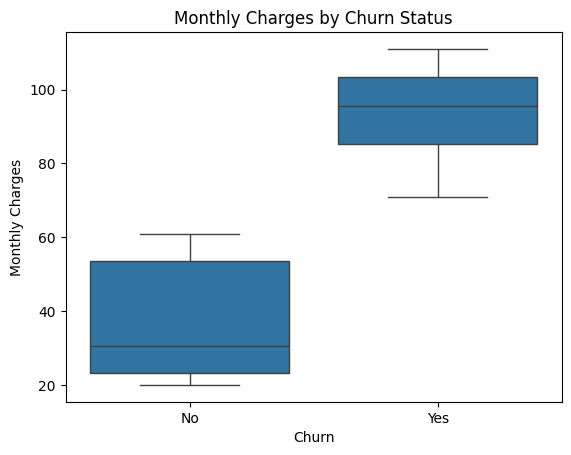

In [8]:
# Step 4: Exploratory Data Analysis (EDA)
# Visualizing the distribution of 'Age'
sns.histplot(data['Age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png')  # Save the plot for later use in the Word document
plt.show()

# Analyzing the relationship between 'Churn' and 'MonthlyCharges'
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.savefig('monthly_charges_by_churn.png')
plt.show()

In [14]:
# Step 5: Preparing Data for Modeling
# Splitting the data
# Encode the 'Churn' column
label_encoder = LabelEncoder()

data['Churn'] = label_encoder.fit_transform(data['Churn'])
# data.loc[:, 'Churn'] = label_encoder.fit_transform(data['Churn'])
data['Churn'] = data['Churn'].astype(str)
data = data.dropna(subset=['Churn'])
data['Churn'] = data['Churn'].fillna(data['Churn'].mode()[0])

# Define the features (X) and the target variable (y)
X = data[['MonthlyCharges']]
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Building and Training the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Evaluating the Model
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

1.0
[[2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [10]:
data

,Unnamed: 0.1,Unnamed: 0,CustomerID,Gender,Age,Tenure,ServiceTier,MonthlyCharges,TotalCharges,NumTechnicalSupportCalls,HasInternetService,Churn
0,0,0.0,1,Male,25,12,Basic,29.99,359.88,0,No,0
1,1,1.0,2,Female,34,4,Premium,89.99,359.96,2,Yes,1
2,2,2.0,3,Female,20,2,Basic,19.99,39.98,1,Yes,0
3,3,3.0,4,Male,45,23,Plus,60.99,1402.77,3,Yes,0
4,4,4.0,5,Female,39,45,Premium,100.99,4544.45,4,Yes,1
5,5,5.0,6,Male,50,8,Basic,30.99,247.92,0,No,0
6,6,6.0,7,Female,22,16,Plus,70.99,1135.84,2,Yes,1
7,7,7.0,8,Male,28,3,Basic,20.99,62.97,1,Yes,0
8,8,8.0,9,Male,55,56,Premium,110.99,6235.75,5,Yes,1
9,9,9.0,10,Female,30,7,Plus,60.99,426.93,0,Yes,0


In [ ]:
print('Total data points:', len(data))
print('Data points in training set:', len(X_train))
print('Data points in test set:', len(X_test))
